In [15]:
#Importation des librairies nécessaires
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import sklearn as sk
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import os

In [16]:
data_dir = '../data/mushrooms.csv'
mushrooms_df = pd.read_csv(data_dir, delimiter=',', encoding='UTF-8')

In [17]:
target_collumn = 'class'
feature_columns = mushrooms_df.columns.drop([target_collumn])

In [18]:
data_ = preprocessing.LabelEncoder()
for column in feature_columns : 
    data_unique = mushrooms_df[column].unique()
    data_.fit(data_unique)
    mushrooms_df[column] = data_.transform(mushrooms_df[column] ) 

In [34]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(mushrooms_df[feature_columns], mushrooms_df[target_collumn], test_size=0.3, random_state=3)

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)

In [36]:
knn.fit(X_trainset, y_trainset)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
y_pred = knn.predict(X_testset)
y_pred

array(['e', 'e', 'e', ..., 'e', 'p', 'p'], dtype=object)

In [38]:
pd.concat([X_testset, y_testset, pd.Series(y_pred, name="Predicted", index=X_testset.index)], ignore_index=False, axis=1)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,Predicted
3689,2,3,3,1,5,1,0,0,7,1,...,7,0,2,1,4,3,4,0,e,e
3768,2,3,2,1,5,1,0,0,10,1,...,6,0,2,1,4,3,5,0,e,e
2084,2,0,3,0,5,1,1,0,5,1,...,7,0,2,1,0,2,3,1,e,e
5804,2,0,4,0,5,1,1,1,10,0,...,4,0,2,1,0,7,4,2,e,e
1866,5,3,4,1,5,1,0,0,9,1,...,7,0,2,1,4,3,4,0,e,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,2,0,9,0,2,1,0,0,2,0,...,6,0,2,1,2,1,4,1,p,p
3648,5,0,3,0,2,1,0,0,7,0,...,0,0,2,1,2,1,4,0,p,p
2379,5,0,3,1,5,1,0,0,7,1,...,3,0,2,1,4,2,4,0,e,e
5985,5,3,4,0,2,1,0,1,0,1,...,7,0,2,1,0,7,4,2,p,p


In [39]:
print("Le score de ce modèle est de : {:.2f}%".format(knn.score(X_testset, y_testset)*100))

Le score de ce modèle est de : 99.96%


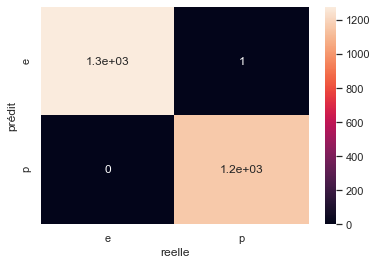

In [40]:
#Affichage de la matrice de confusion pour déterminer où sont les erreurs de classement
cm = confusion_matrix(y_testset, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['e','p'], 
                     columns = ['e','p'])

sns.heatmap(cm_df, annot=True)
plt.ylabel('prédit')
plt.xlabel('reelle')
plt.show()